##이진 분류의 문제 

분류는 0 과 1 로 예측 해야 하는데 

1.
임계치  이값을 넘기면 1 아니면 0 

문제 가 발생  = 경사 하강법 즉 미분이 안됌 

다른 방식이 필요함 

2.
0 에 가까우면 0 1에 가까우면 1 but 이것도 y값이 뭐가 나올지 몰라서 제어 할수 가 없음 -> 순전파도 안됌 

3.
y 값 을  0 or 1 로 바꿔주는  sigmoid 를 사용했다 

4.mse 방식으로는 loss 값을 판단 하기 힘들어서 
###cross entropy 를 발명 
확률 분포 로 학습  = 서로간의 확률 분포와 실제값의 확률 분포가 서로 비슷하다면 cross entorpy 값은 낮아지게 됩니다 . 

반대로 둘이 서로 멀어지면 멀어진다 

자연상수를 쓰면 값에 민감도를 주어줄수 있다


In [2]:
import numpy as np
import matplotlib.pyplot as plt
 

In [3]:
x = np.arange(0,10,1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
e_rows = []
for i in x:
  e = np.exp(i)
  e_rows.append(e)


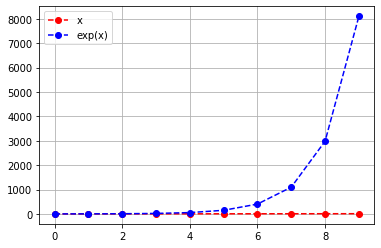

In [5]:
plt.plot(x,'r--o',label = 'x')
plt.plot(e_rows,'b--o',label = 'exp(x)')
plt.grid()
plt.legend()
plt.show()

y  = 0.5 라고 출력 했다 
참일 확률을 0.5 라고 기준을 할수 있다 

참이 아닌것은 y = 0


In [6]:
#참일 확률과 거짓이 확률 
def exp(x):
  return np.round(np.exp(x),3)

In [7]:
A_real = exp(0.5)
A_fake = exp(0)

print(A_real)
print(A_fake)
'''
1.649
1.0
이진 분류는 참 아니면 거짓 
확률의 합은 1이지만 
1이 넘어간다 

= 비례 상수 가 필요하다 (k)
'''

1.649
1.0


'\n1.649\n1.0\n이진 분류는 참 아니면 거짓 \n확률의 합은 1이지만 \n1이 넘어간다 \n\n= 비례 상수 가 필요하다 (k)\n'

In [8]:
#비례 상수(k) 분자는 1 분모는 0.5 + 0 의 exp 값 의 합 

k = 1/(A_real + A_fake) #확률 정의 론
print(np.round(A_real * k,3)) #A_real 일 확률 =  전체 중에 A의 확률값  / 전체 확률의 값
print(np.round(A_fake * k,3)) #A_real 일 확률 =  전체 중에 A가 아닌 확률값  / 전체 확률의 값


0.622
0.378


In [9]:
#비례 상수가 음수도 먹히냐 
A_real = exp(-1)
A_fake = exp(0)

print(A_real)
print(A_fake)

0.368
1.0


In [10]:
k = 1 / (A_real+A_fake)
print(np.round(A_real * k,3)) #A_real 일 확률 =  전체 중에 A의 확률값  / 전체 확률의 값
print(np.round(A_fake * k,3)) #A_real 일 확률 =  전체 중에 A가 아닌 확률값  / 전체 확률의 값
#음수값도 먹히긴 하네 

0.269
0.731


In [11]:
#일반화 시키기 
'''
exp(x) = 참일 확률 
exp(0) = 거짓이 확률 = 1

aexp(x) = ae^x
aexp(0) = a

ae^x + a = 1
a(e^x+1) = 1
a = 1/1+e^x

1/(1+e^x) * e^x = e^x()
'''

def sigmoid(x):
  return np.round(1/(1+np.exp(-x)),3)

for i in range(-20,20,2):
  print(i, sigmoid(i))

-20 0.0
-18 0.0
-16 0.0
-14 0.0
-12 0.0
-10 0.0
-8 0.0
-6 0.002
-4 0.018
-2 0.119
0 0.5
2 0.881
4 0.982
6 0.998
8 1.0
10 1.0
12 1.0
14 1.0
16 1.0
18 1.0


##Crossentropy
 신호에 존재하는 정보의 양을 측정하는 이론 
 정보의양 == 전구의 개수 

1개의 전구가 경우의수는 키다 끄다  2 
2개의 전구가 보여줄 경우의수 2 ^2
3개의 전구가 보여줄수 있는 경우의수 2^3
4개의 전구가 보여줄수 있는 경우의수 2^4

전구는 정보의 양 
단위 정보의수 는 2(0비트 1비트) 

지수의 함수 = 역함수는 log 이다 

내가 전구의 경우의 수를 알면 전구의 수를 알수 있다 



In [12]:
import numpy as np

def amount_of_info(number_of_units_infomation, expression_range):
    if number_of_units_infomation == 2:
        amount_of_infomation = np.log2(expression_range)
    else:
        print("Check The Param(number_of_units_infomation)")

    return np.round(amount_of_infomation,3)

amount_of_infomation = amount_of_info(2, 64)

expression_range = [2, 4, 8, 16, 32]

for i in expression_range:
    amount_of_infomation = amount_of_info(2, i)
    print("Amount_of_infomation : ", amount_of_infomation)

Amount_of_infomation :  1.0
Amount_of_infomation :  2.0
Amount_of_infomation :  3.0
Amount_of_infomation :  4.0
Amount_of_infomation :  5.0


만약에 균일 하지 않은 확률 

예를 들면 

idx 0    1    2
P(x)1/2 1/4 1/4 동일 확률이 아니라 다른 확률 값 이 있다면 

sum(1/a * log2(a))
sum(idx * p(x)) = E(x) = 기대값 

pi = 1/ai

1/pi = ai

sum(pi*log2(1/pi))

-sum(pi * log2pi) = infomation entropy


머신러닝에서는 자연상수르 많이 쓴다 
자연상수를 쓰면 값이 좀더 민감하고 세분하게 작동한다.

정보의 양을 측정할떄 
엔트로피 가 높으면 예측 하기 어렵다(데이터의 범위가 넓다) 
엔트로피가 낮으면 예측하기 쉽다(데이터의 범위가 좁다 예측하기 편하다)

In [13]:
rain_probility     = 0.01
no_rain_probility  = 0.99

def amount_of_infomation(prob):
    amount_of_info = -np.log(prob)
    return np.round(amount_of_info,3)

H_1 = amount_of_infomation(rain_probility)
H_2 = amount_of_infomation(no_rain_probility)

print("Rain_prob_amount_of_info : ", H_1)
print("No_Rain_prob_amount_of_info : ", H_2)

Rain_prob_amount_of_info :  4.605
No_Rain_prob_amount_of_info :  0.01


cross entropy 
- sum(pi log qi) 
확실한 정보 가 아닌 틀릴수 있는 정보의 확률 분포로 바꿔준다  = 신경망의 예측 결과 가 qi 에 대입해서 계산한다 
cross entropy 가 낮아지면 실제 값 이 낮아지는 방법으로 
정보 엔트로피가 = 실제값
교차 엔트로피가 = 예측값 



In [15]:
#확률값(p)
kor_win = 0.526
kor_draw = 0.295
kor_lose = 0.179

real = np.array([0.526,0.295,0.179])
#예측값
win_pred = 0.6
draw_pred = 0.2
lose_pred = 0.2
human = np.array([0.6,0.2,0.2])


#Ai predict
AI = np.array([0.4,0.3,0.3])



class entropy():
  def __init__(self,prob,q):
    self.prob = prob
    self.q = q


  def out_entropy(self,H_PQ = True):
    if H_PQ == True: #정보 엔트로피 계산
      return -1*np.sum(self.prob * np.log(self.prob))
    else:       #crossentropy 계산
      return -1*np.sum(self.prob * np.log(self.q))



E1 = entropy(real,human)
E2 = entropy(real,AI)

print(E1.out_entropy(True))
print(E1.out_entropy(False))

print(E2.out_entropy(True))
print(E2.out_entropy(False))




1.0060070517163597
1.0315678485946747
1.0060070517163597
1.0526520342162993
